<a href="https://colab.research.google.com/github/John-Akech/TensorFlow_Participation-Assignment/blob/master/TensorFlow_Participation_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
'''

Participation Assignment

Team Members:

1. John Akech
2. Kuir Juach Kuir

'''

'\n\nParticipation Assignment\n\nTeam Members:\n\n1. John Akech\n2. Kuir Juach Kuir\n\n'

In [5]:
# Import the libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import struct
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Load the dataset
def load_images(file_path):
    with open(file_path, 'rb') as f:
        # Read image file header
        magic_number, num_images, rows, cols = struct.unpack(">IIII", f.read(16))
        # Read image data
        data = np.frombuffer(f.read(), dtype=np.uint8)
        # Reshape into (num_images, rows, cols)
        return data.reshape(num_images, rows, cols)

def load_labels(file_path):
    with open(file_path, 'rb') as f:
        # Read label file header
        magic_number, num_labels = struct.unpack(">II", f.read(8))
        # Read label data
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

# Load images and labels
X = load_images('/content/t10k-images-idx3-ubyte') / 255.0  # Normalize pixel values to [0, 1]
Y = load_labels('/content/t10k-labels-idx1-ubyte')  # Labels are integers, no need to normalize

print(f"X shape: {X.shape}, Y shape: {Y.shape}")

X shape: (10000, 28, 28), Y shape: (10000,)


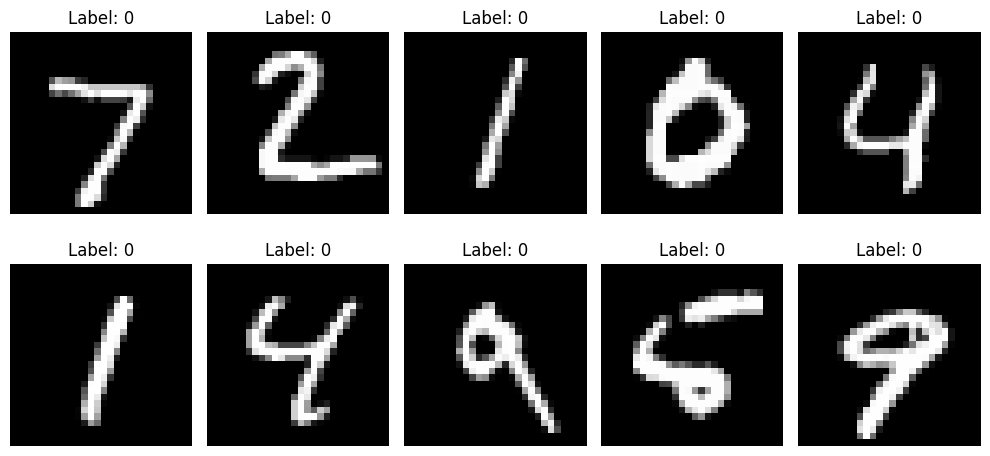

In [7]:
# Visualize the Dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')  # Reshape each flat image to 28x28
    plt.title(f"Label: {np.argmax(Y[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
# Preprocess the Data
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Flatten images and one-hot encode labels
X = X.reshape(X.shape[0], -1)
Y = to_categorical(Y, num_classes=10)

# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

Training data shape: (7500, 784), Test data shape: (2500, 784)


In [9]:
# Build the Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer and first hidden layer
    Dense(64, activation='relu'),  # Second hidden layer
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compile the Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',  # Use this for multi-class classification
    metrics=['accuracy']
)

In [11]:
# Train the Model
history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=10,
    batch_size=32
)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7278 - loss: 0.9550 - val_accuracy: 0.9092 - val_loss: 0.3078
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9289 - loss: 0.2395 - val_accuracy: 0.9192 - val_loss: 0.2665
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9544 - loss: 0.1593 - val_accuracy: 0.9372 - val_loss: 0.2169
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9720 - loss: 0.0977 - val_accuracy: 0.9420 - val_loss: 0.1939
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9839 - loss: 0.0609 - val_accuracy: 0.9396 - val_loss: 0.2159
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9877 - loss: 0.0463 - val_accuracy: 0.9468 - val_loss: 0.1951
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9967 - loss: 0.0249 - val_accuracy: 0.9476 - val_loss: 0.1979
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9964 - loss: 0.0215 - val_accuracy: 0.

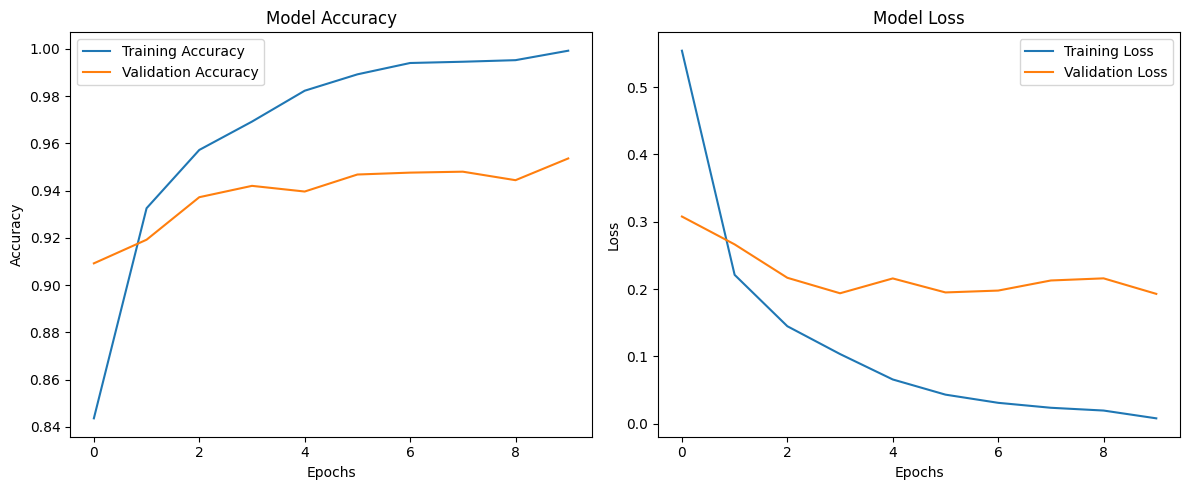

In [12]:
# Visualize Training History
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
# Save the Model
model.save('my_neural_network.h5')
print("Model saved as my_neural_network.h5")

Model saved as my_neural_network.h5


In [14]:
# Make Predictions
# Load the saved model
loaded_model = tf.keras.models.load_model('my_neural_network.h5')

# Predict on test data
predictions = loaded_model.predict(X_test[:5])

# Display predictions
for i, prediction in enumerate(predictions):
    print(f"Image {i+1}: Predicted label = {np.argmax(prediction)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Image 1: Predicted label = 6
Image 2: Predicted label = 2
Image 3: Predicted label = 3
Image 4: Predicted label = 7
Image 5: Predicted label = 2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


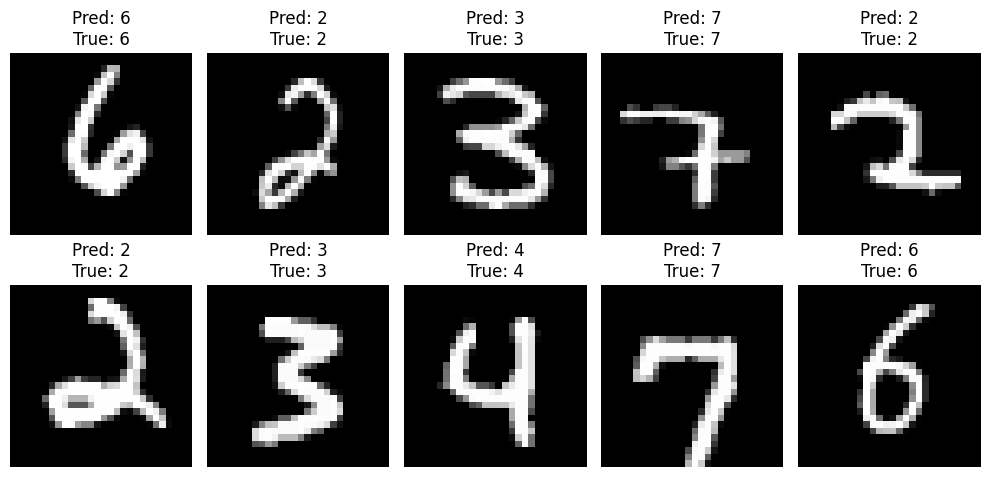

In [15]:
# Visualize Predictions
# Make predictions
predictions = loaded_model.predict(X_test[:10])

# Visualize predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {np.argmax(Y_test[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


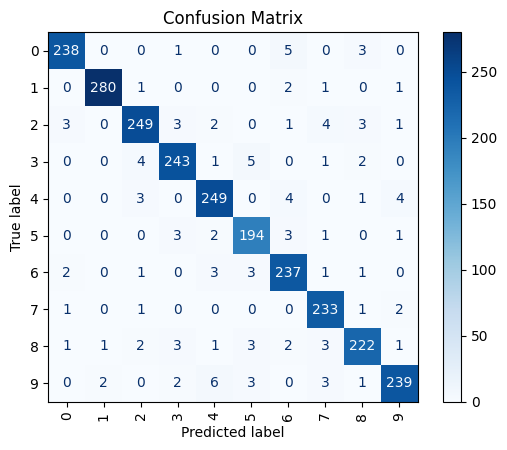

In [16]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
y_true = np.argmax(Y_test, axis=1)
y_pred = np.argmax(loaded_model.predict(X_test), axis=1)
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()